## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 11. Сегментация. Часть I 

### 1. Что вас ждёт в этом модуле?

⛏ В предыдущих модулях вы познакомились с метриками качества алгоритмов локализации и детектирования, а также научились использовать технику переноса для обучения современных моделей распознавания объектов.

Вы уже знакомы с:

- метриками качества для задач локализации и детектирования;
- процессом переноса обучения одноуровневых и двухуровневых детекторов;
- сферами применения алгоритмов распознавания, детекции и локализации.

**Сегментация** — это центральный алгоритм для многих систем распознавания. За последний год мы используем её всё чаще: сегментация и отделение фона в Zoom, Skype, Google, онлайн-примерка обуви (Lamoda), фильтры для лица и многое другое. С каждым годом сфера применения сегментации становится всё шире.

#### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- постановку задачи сегментации и сферы её применения;

- базовые типы сегментации (в т. ч. классические);

- как подготовить данные и разметку вручную;

- loss-функции и метрики;

- основные архитектуры.

#### ВЫ НАУЧИТЕСЬ:

- подготавливать данные;

- выбирать алгоритм под задачи;

- самостоятельно реализовывать сегментацию.

### 2. Постановка задачи и сферы применения

**Сегментация изображений** — это важный компонент многих систем распознавания. Она включает в себя разделение изображений (или видео) на несколько сегментов или объектов.

Сегментация играет центральную роль в широком спектре приложений:

1) Анализ медицинских изображений

### 3. Базовые типы сегментации

В данном юните мы рассмотрим некоторые методы семантической сегментации с использованием классических подходов, а также подходов, основанных на глубоком обучении.

#### БИНАРИЗАЦИЯ

Бинаризация изображения — это процесс преобразования изображения из серого (0-256) в чёрно-белое (0, 1), что существенно сокращает информацию, содержащуюся в изображении, с 256 оттенков серого до 2.

Часто это называется установлением порога для изображения, хотя при установлении порога могут создаваться изображения с несколькими сегментами (один объект лежит до 125, другой — выше 125). Такая сегментация, при которой изображение делится на составляющие объекты, обычно выполняется при попытке извлечь объект из изображения. Однако, как и многие операции обработки изображений, это нетривиально и зависит исключительно от содержимого изображения.

Проблема в том, что изображения, которые могут казаться лёгкими для преобразования в чёрно-белые, во многих случаях таковыми не являются.
Давайте возьмём картинку с монетой, переведём её в серую, после чего выберем порог на гистограмме:

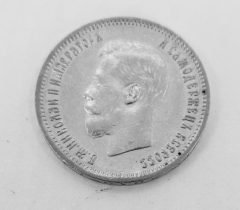Img

Вероятно, оптимальная граница будет лежать около 180.

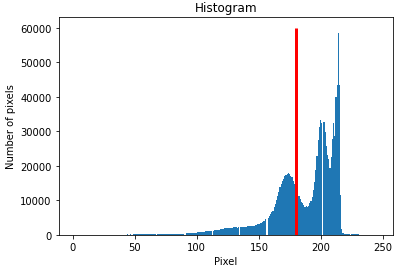Img

Результат:

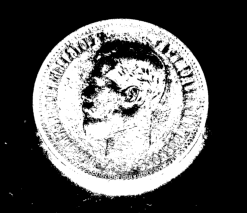Img

Как видим, если добавить небольшой процессинг и заполнить пропуски, то мы вполне можем отделить монету от фона. Разделив пиксели на данном изображении, мы можем заметить, что сегментация — это группировка пикселей по признакам.

Подчеркнём, что в случае с монетой всё просто, но если мы столкнёмся с изображением вроде этого,

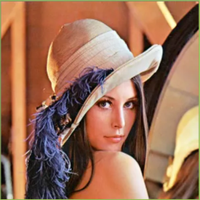
Источник изображения (https://en.wikipedia.org/wiki/Lenna)

то при бинаризации получим следующее:

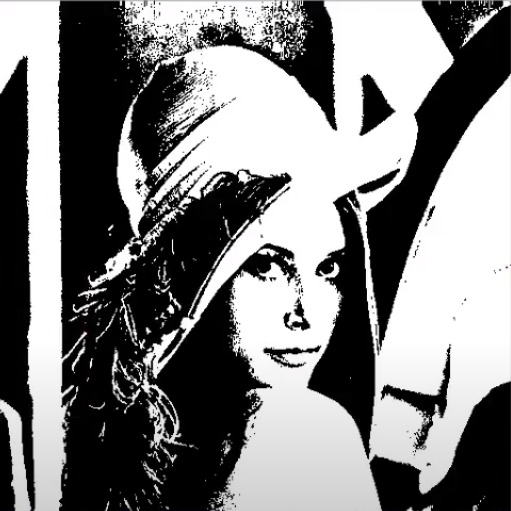

К сожалению, отделить девушку от фона тут никак не получится.

Помимо бинаризации, существует множество методов по извлечению сегментов, например: k-среднее, условные случайные поля, графы, mean-shift, признаки, выбранные людьми. Эти методы использовались до того, как появились более современные методы глубоко обучения.

#### INSTANCE- И SEMANTIC-СЕГМЕНТАЦИЯ

**Семантическая сегментация** — это процесс присвоения метки каждому пикселю изображения.

Это резко контрастирует с классификацией, когда всему изображению присваивается одна метка.


Семантическая сегментация рассматривает несколько объектов одного класса как одну сущность.

С другой стороны, сегментация экземпляров рассматривает несколько объектов одного класса как отдельные индивидуальные объекты (или экземпляры). Обычно сегментация экземпляров (instance) сложнее семантической.

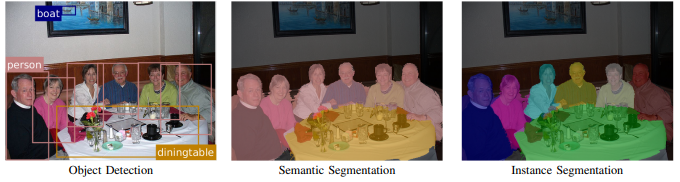img
Источник изображения (https://www.datamaker.io/posts/17/)

С данным типом сегментации мы позже познакомимся более подробно.

#### IMAGE MATTING

**Image matting**, или **матирование** — это процесс разделения изображения на передний план и фон.

Он используется для объединения переднего плана и, например, нового фона.

Матирование — ключевая техника, лежащая в основе эффекта зелёного экрана (хромакей), и она широко используется в производстве видео, в графике и потребительских приложениях.

Чтобы смоделировать эту проблему, мы представляем каждый пиксель в захваченном изображении как оптимальную линейную комбинацию переднего плана и фона:

где  — коэффициент комбинации, который определяет прозрачность каждого пикселя,  — пиксель переднего плана,  — пиксель фона,  — пиксель изображения.

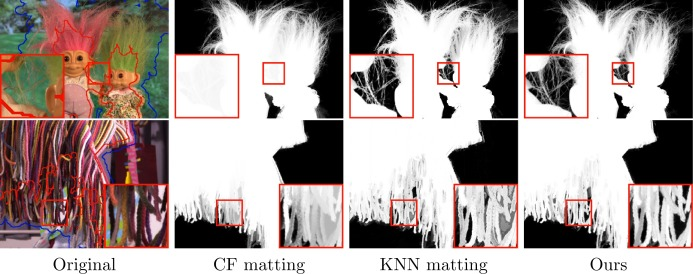img
Источник изображения (https://pathmustmeg.live/?utm_campaign=INccHxHRWrew3TQsLBbfNnbGFYUZobMqxXT9Zrw5FhI1&t=main9other)

Зачем нужно матирование? Почему бы просто не использовать сегментацию?

Хотя в последние годы сегментация достигла огромных успехов, она не решает полного уравнения матирования. Сегментация присваивает двоичную метку (0,1) каждому пикселю, чтобы отделить передний план и фон, вместо решения для непрерывного -значения. Эффект от этого упрощения виден в следующем примере:

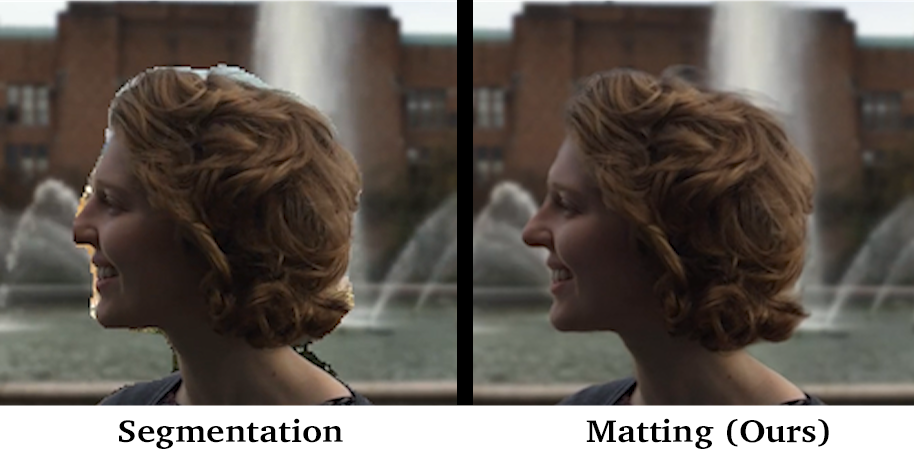img
Источник изображения (https://grail.cs.washington.edu/projects/background-matting/)

Области по краю изображения, особенно в волосах, имеют истинное значение  от 0 до 1. Следовательно, бинарный характер сегментации создаёт резкую границу вокруг переднего плана, оставляя видимые артефакты. Решение для частичной прозрачности и цвета переднего плана позволяет значительно улучшить фото во втором кадре.


В этом юните мы:

- познакомились с классическим методом сегментации изображения — бинаризацией и разобрали небольшой пример с монетой;
- узнали про недостатки этого метода, с которыми вам, возможно, придётся столкнуться практике;
- частично открыли для себя современные задачи компьютерного зрения и глубокого обучения — Instance- и Semantic-сегментацию, узнали, в чём между ними разница;
- разобрались с матированием — способом аккуратного отделения объекта от фона.